In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [122]:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [123]:
df = pd.read_csv('movies_complete.csv', parse_dates = ['release_date'])

In [124]:
df[:3]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

<AxesSubplot:>

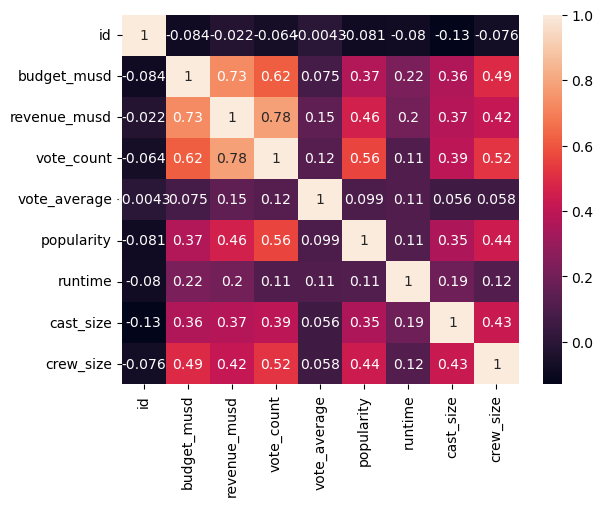

In [126]:
sns.heatmap(df.corr(), annot = True)

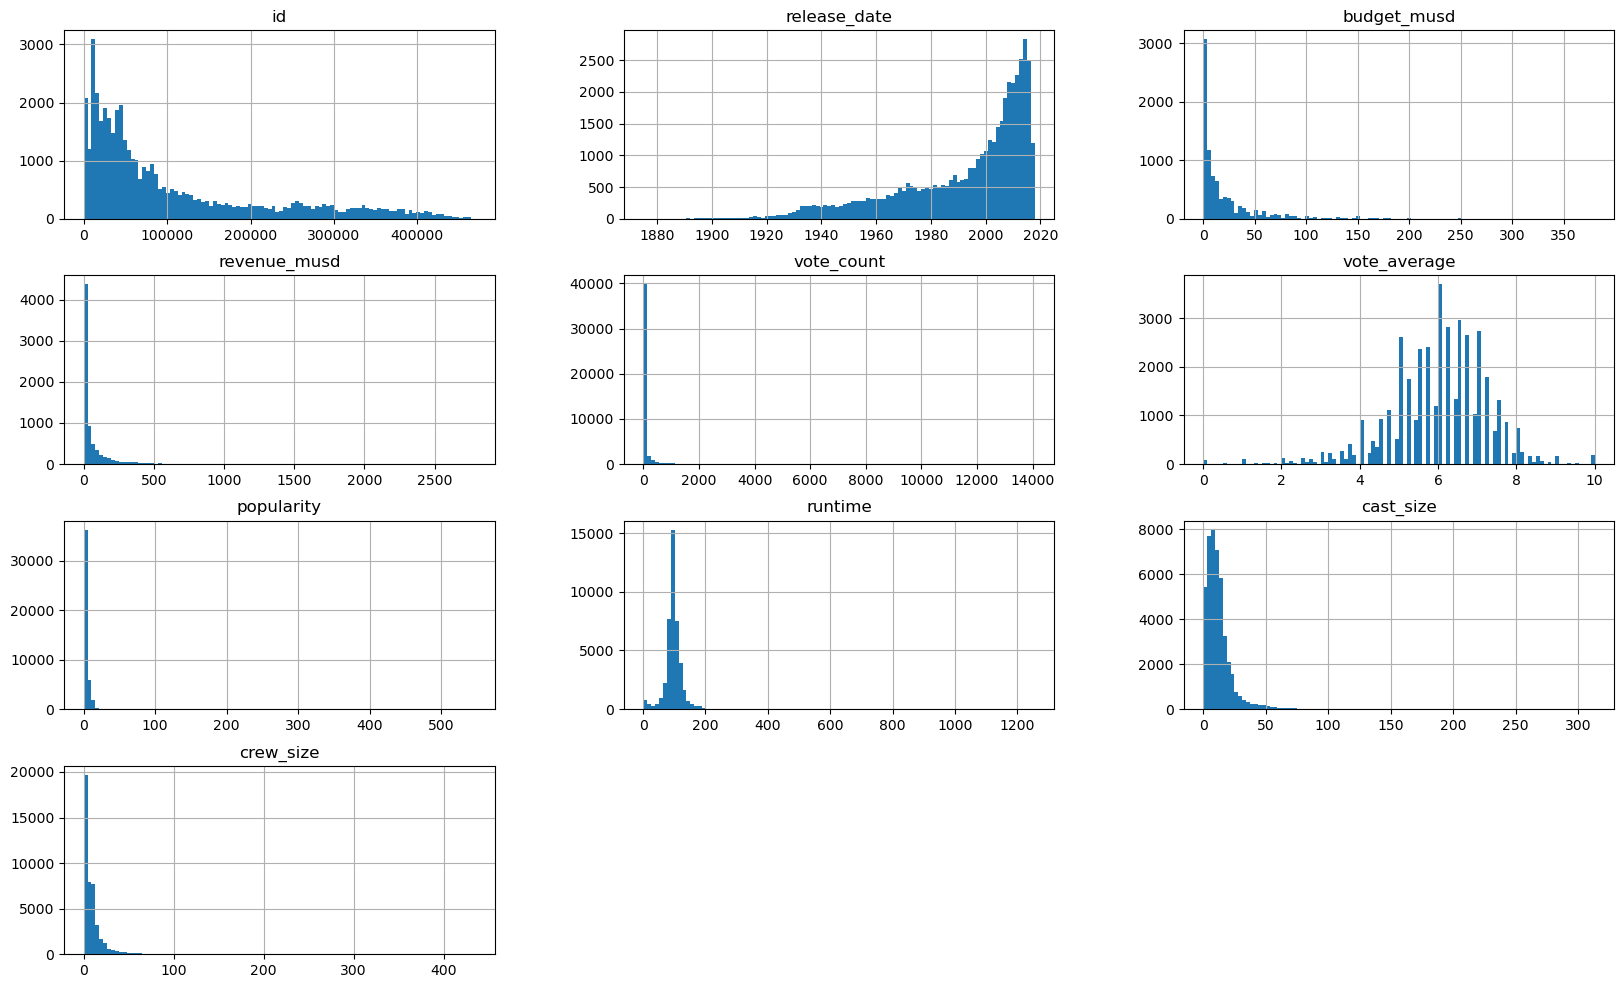

In [127]:
df.hist(figsize = (20, 12), bins = 100)
plt.show()

#### Questions:
- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity  
Define appropriate reusable functions.

In [128]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [129]:
df.revenue_musd.nlargest(1)

14448   2787.97
Name: revenue_musd, dtype: float64

In [130]:
df.loc[: , ['revenue_musd']].sort_values(by = 'revenue_musd', ascending = False)

,revenue_musd
14448,2787.97
26265,2068.22
1620,1845.03
17669,1519.56
24812,1513.53
...,...
44686,NaN
44687,NaN
44688,NaN
44689,NaN


In [131]:
df['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
df['roi'] = df.revenue_musd.div(df.budget_musd)

In [132]:
df[:5]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit_musd,roi
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,343.55,12.45
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,197.80,4.04
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,NaN,NaN
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,65.45,5.09
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,NaN,NaN


In [133]:
data = df[['poster_path', 'title', 'budget_musd', 'revenue_musd', 
           'vote_count', 'vote_average', 'popularity', 'profit_musd', 'roi']].copy()

In [134]:
data[:5]

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,roi
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN


In [135]:
data.columns = data.columns.str.replace('_', ' ').str.title()

In [137]:
data.rename(columns = {'Poster Path': '', 'Roi': 'ROI'}, inplace = True)

In [138]:
data.columns

Index(['', 'Title', 'Budget Musd', 'Revenue Musd', 'Vote Count',
       'Vote Average', 'Popularity', 'Profit Musd', 'ROI'],
      dtype='object')

In [139]:
data.set_index('Title', inplace = True)

In [140]:
data.head()

,,Budget Musd,Revenue Musd,Vote Count,Vote Average,Popularity,Profit Musd,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.00,6.50,11.71,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.58,173.00,5.70,8.39,NaN,NaN


In [141]:
HTML(data.sort_values(by = 'Vote Average', ascending = False)[:5].to_html(escape = False))

,,Budget Musd,Revenue Musd,Vote Count,Vote Average,Popularity,Profit Musd,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.00,10.00,0.04,NaN,NaN
Brave Revolutionary,,NaN,NaN,1.00,10.00,0.32,NaN,NaN
Other Voices Other Rooms,,NaN,NaN,1.00,10.00,0.04,NaN,NaN
The Lion of Thebes,,NaN,NaN,1.00,10.00,1.78,NaN,NaN
Katt Williams: Priceless: Afterlife,,NaN,NaN,2.00,10.00,0.48,NaN,NaN


In [142]:
data.ROI.sort_values(ascending = False)[:5]

Title
Less Than Zero            12396383.00
Modern Times               8500000.00
Welcome to Dongmakgol      4197476.62
Aquí Entre Nos             2755584.00
The Karate Kid, Part II    1018619.28
Name: ROI, dtype: float64

In [144]:
data.loc[data['Budget Musd'] > 5]

,,Budget Musd,Revenue Musd,Vote Count,Vote Average,Popularity,Profit Musd,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Heat,<img src='http://image.tmdb.org/t/p/w185//lbf2...,60.00,187.44,1886.00,7.70,17.92,127.44,3.12
Sabrina,<img src='http://image.tmdb.org/t/p/w185//z1oN...,58.00,NaN,141.00,6.20,6.68,NaN,NaN
...,...,...,...,...,...,...,...,...
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.00,NaN,67.00,7.30,9.80,NaN,NaN
Sivaji: The Boss,<img src='http://image.tmdb.org/t/p/w185//nqS3...,12.00,19.00,25.00,6.90,1.32,7.00,1.58
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.40,NaN,153.00,5.30,5.61,NaN,NaN


In [145]:
data.sort_values(by = 'ROI', ascending = False)

,,Budget Musd,Revenue Musd,Vote Count,Vote Average,Popularity,Profit Musd,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.00,3.80,0.90,NaN,NaN


In [146]:
data.loc[data['Budget Musd'] > 5].sort_values(by = 'ROI', ascending = False)

,,Budget Musd,Revenue Musd,Vote Count,Vote Average,Popularity,Profit Musd,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
The Exorcist,<img src='http://image.tmdb.org/t/p/w185//4ucL...,8.00,441.31,2046.00,7.50,12.14,433.31,55.16
Four Weddings and a Funeral,<img src='http://image.tmdb.org/t/p/w185//qa72...,6.00,254.70,654.00,6.60,8.99,248.70,42.45
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.50,NaN,3.00,4.00,0.88,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.00,NaN,67.00,7.30,9.80,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.40,NaN,153.00,5.30,5.61,NaN,NaN


In [148]:
data['Budget Musd'].fillna(0, inplace = True)
data['Vote Count'].fillna(0, inplace = True)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0                 44467 non-null  object 
 1   Budget Musd   44691 non-null  float64
 2   Revenue Musd  7385 non-null   float64
 3   Vote Count    44691 non-null  float64
 4   Vote Average  42077 non-null  float64
 5   Popularity    44691 non-null  float64
 6   Profit Musd   5371 non-null   float64
 7   ROI           5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [167]:
def n_best_worst_movies (by = '', count = 5, ascending = False, minb = 0, minv = 0):
    out = data.loc[(data['Budget Musd'] >= minb) & (data['Vote Count'] >= minv), ['', by]].sort_values(by = by, ascending = ascending)[:count]
    return HTML(out.to_html(escape = False))

In [168]:
n_best_worst_movies(by = 'ROI', count = 5, ascending = False, minb = 5, minv = 100)

,,ROI
Title,,
E.T. the Extra-Terrestrial,,75.52
My Big Fat Greek Wedding,,73.75
Star Wars,,70.49
Jaws,,67.24
Crocodile Dundee,,65.64


In [169]:
n_best_worst_movies(by = 'Revenue Musd', count = 5, ascending = False, minb = 5, minv = 100)

,,Revenue Musd
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


In [170]:
n_best_worst_movies(by = 'Budget Musd', count = 5, ascending = False, minb = 5, minv = 100)

,,Budget Musd
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Tangled,,260.00


In [171]:
n_best_worst_movies(by = 'Profit Musd', count = 5, ascending = False, minb = 5, minv = 100)

,,Profit Musd
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


In [172]:
n_best_worst_movies(by = 'Profit Musd', count = 5, ascending = True, minb = 5, minv = 100) 

,,Profit Musd
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


In [175]:
n_best_worst_movies(by = 'ROI', count = 5, ascending = False, minb = 50, minv = 100)

,,ROI
Title,,
Minions,,15.63
Jurassic Park,,14.60
The Twilight Saga: New Moon,,14.20
Deadpool,,13.50
Despicable Me 2,,12.77


In [178]:
n_best_worst_movies(by = 'ROI', count = 5, ascending = True, minb = 20, minv = 100)

,,ROI
Title,,
Chasing Liberty,,0.00
Chaos,,0.00
Kung Fu Jungle,,0.01
Momentum,,0.01
Metropolis,,0.01


In [179]:
n_best_worst_movies(by = 'ROI', count = 5, ascending = True, minb = 100, minv = 0)

,,ROI
Title,,
The Adventures of Pluto Nash,,0.07
The Alamo,,0.18
Live by Night,,0.21
Mars Needs Moms,,0.26
The Lone Ranger,,0.35


In [180]:
n_best_worst_movies(by = 'Vote Count', count = 5, ascending = False, minb = 0, minv = 0)

,,Vote Count
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


In [186]:
n_best_worst_movies(by = 'Vote Average', count = 5, ascending = False, minb = 0, minv = 10)

,,Vote Average
Title,,
As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty,,9.50
Planet Earth II,,9.50
The Civil War,,9.20
Dilwale Dulhania Le Jayenge,,9.10
Cosmos,,9.10


In [187]:
n_best_worst_movies(by = 'Vote Average', count = 5, ascending = False, minb = 0, minv = 50)

,,Vote Average
Title,,
Planet Earth II,,9.50
Dilwale Dulhania Le Jayenge,,9.10
Planet Earth,,8.80
Sansho the Bailiff,,8.70
The Jinx: The Life and Deaths of Robert Durst,,8.60


In [189]:
n_best_worst_movies(by = 'Vote Average', count = 5, ascending = True, minb = 0, minv = 100)

,,Vote Average
Title,,
House of the Dead,,2.80
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


In [191]:
n_best_worst_movies(by = 'Vote Average', count = 5, ascending = True, minb = 20, minv = 20)

,,Vote Average
Title,,
Foodfight!,,2.30
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


In [192]:
n_best_worst_movies(by = 'Popularity')

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


### What movie should I watch next?

#### Q1
- Action and Science Fiction
- Bruce Willis

In [194]:
df.head(3)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit_musd,roi
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,343.55,12.45
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,197.80,4.04
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,NaN,NaN


In [195]:
df.genres.str.split('|', expand = True)

,0,1,2,3,4,5,6,7
0,Animation,Comedy,Family,None,None,None,None,None
1,Adventure,Fantasy,Family,None,None,None,None,None
2,Romance,Comedy,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
44686,Drama,Family,None,None,None,None,None,None
44687,Drama,None,None,None,None,None,None,None
44688,Action,Drama,Thriller,None,None,None,None,None
44689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
filt_genres = (df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')).fillna(False)
filt_cast = df.cast.str.contains('Bruce Willis').fillna(False)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [207]:
df.loc[filt_cast & filt_genres, ['title', 'vote_average']].sort_values(
    by = 'vote_average', ascending = False).head(5)

,title,vote_average
1448,The Fifth Element,7.30
19218,Looper,6.60
1786,Armageddon,6.50
14135,Surrogates,5.90
20333,G.I. Joe: Retaliation,5.40


In [210]:
bruce_action_scifi = df.loc[filt_cast & filt_genres, ['title', 'poster_path', 
                                                      'vote_average']].sort_values(
    by = 'vote_average', ascending = False).head(5)
HTML(bruce_action_scifi.to_html(escape = False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.30
19218,Looper,,6.60
1786,Armageddon,,6.50
14135,Surrogates,,5.90
20333,G.I. Joe: Retaliation,,5.40


#### Q2
Casting Uma Thurman and directed by Quentin Tarntino and low runtime

In [211]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit_musd', 'roi'],
      dtype='object')

In [220]:
filt_cast = df.cast.str.contains('Uma Thurman').fillna(False)
filt_direc = df.director == 'Quentin Tarantino'

In [221]:
df[filt_cast]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit_musd,roi
92,9283,Beautiful Girls,"Good times never seemed so good,",1996-02-09,Comedy|Drama|Romance,NaN,en,NaN,NaN,Miramax Films|Woods Entertainment,United States of America,103.00,6.60,4.67,112.00,During a snowy winter in the small fictional t...,English,<img src='http://image.tmdb.org/t/p/w185//jAeL...,Matt Dillon|Noah Emmerich|Annabeth Gish|Lauren...,39,35,Ted Demme,NaN,NaN
291,680,Pulp Fiction,Just because you are a character doesn't mean ...,1994-09-10,Thriller|Crime,NaN,en,8.00,213.93,Miramax Films|A Band Apart|Jersey Films,United States of America,8670.00,8.30,140.95,154.00,"A burger-loving hit man, his philosophical par...",English|Español|Français,<img src='http://image.tmdb.org/t/p/w185//d5iI...,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,54,87,Quentin Tarantino,205.93,26.74
438,34444,Even Cowgirls Get the Blues,NaN,1994-05-13,Western|Drama|Comedy|Romance,NaN,en,8.00,NaN,Fine Line Features,United States of America,29.00,4.20,2.97,96.00,Sissy Hankshaw (Uma Thurman) is born with enor...,English|Deutsch,<img src='http://image.tmdb.org/t/p/w185//ladV...,Uma Thurman|Lorraine Bracco|Pat Morita|Angie D...,18,22,Gus Van Sant,NaN,NaN
690,8866,The Truth About Cats & Dogs,Brian's about to discover the woman he loves i...,1996-04-26,Comedy|Romance,NaN,en,NaN,NaN,Twentieth Century Fox Film Corporation|Noon At...,United States of America,86.00,5.70,5.12,93.00,A successful veterinarian and radio show host ...,English,<img src='http://image.tmdb.org/t/p/w185//5V10...,Uma Thurman|Janeane Garofalo|Ben Chaplin|James...,8,51,Michael Lehmann,NaN,NaN
729,41007,A Month by the Lake,NaN,1995-09-11,Comedy|Drama|Romance,NaN,en,NaN,NaN,Miramax Films|Anuline,United Kingdom|United States of America,7.00,7.20,0.85,92.00,For 16 years Miss Bentley has been spending Ap...,English,<img src='http://image.tmdb.org/t/p/w185//cgoi...,Vanessa Redgrave|Edward Fox|Uma Thurman|Alida ...,7,25,John Irvin,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30803,58075,My Zinc Bed,Attraction. Temptation. Addiction.,2008-08-27,TV Movie|Drama,NaN,en,NaN,NaN,BBC Films|Home Box Office (HBO)|Rainmark Films...,United Kingdom|United States of America,3.00,5.30,0.41,75.00,A recovering alcoholic becomes involved with h...,English,<img src='http://image.tmdb.org/t/p/w185//zEhz...,Uma Thurman|Jonathan Pryce|Paddy Considine|Ver...,5,2,Anthony Page,NaN,NaN
32640,295964,Burnt,Never underestimate a man with everything to l...,2015-10-02,Drama,NaN,en,20.00,36.61,Double Feature Films|PeaPie Films|3 Arts Enter...,United States of America,974.00,6.30,8.07,100.00,Adam Jones is a Chef who destroyed his career ...,Français|English,<img src='http://image.tmdb.org/t/p/w185//iptu...,Bradley Cooper|Sienna Miller|Lily James|Alicia...,27,24,John Wells,16.61,1.83
37159,384205,The Gift,NaN,2014-07-26,Romance|Drama,NaN,en,NaN,NaN,Trigger Street Productions|Jameson/ First Shot,United States of America,6.00,6.00,0.60,8.00,A department store gift wrapper is a lonely sp...,English,<img src='http://image.tmdb.org/t/p/w185//y4Q6...,Uma Thurman|Andrew Bowen|Edie McClurg,3,2,Ivan Petukhov,NaN,NaN
37311,362541,Jump!,NaN,2014-07-26,Comedy|Drama,NaN,en,NaN,NaN,Trigger Street Productions,United States of America,4.00,6.80,0.54,18.00,"During a 48hr observation at a psych facility,...",English,<img src='http://image.tmdb.org/t/p/w185//lNI0...,Uma Thurman|Barak Hardley|Anthony Ray Parker|P...,5,18,Jessica Valentine,NaN,NaN


In [227]:
quin_uma = df.loc[filt_cast & filt_direc, ['poster_path', 'title', 'runtime']].sort_values(by = 'runtime', ascending=True)

In [228]:
HTML(quin_uma.to_html(escape = False))

,poster_path,title,runtime
6667,,Kill Bill: Vol. 1,111.00
7208,,Kill Bill: Vol. 2,136.00
291,,Pulp Fiction,154.00


#### Q3
Most succesful Pixar Studio movies between 2010 - 2015, basis revenue

In [229]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit_musd', 'roi'],
      dtype='object')

In [230]:
df.production_companies.head(5)

0                              Pixar Animation Studios
1    TriStar Pictures|Teitler Film|Interscope Commu...
2                          Warner Bros.|Lancaster Gate
3               Twentieth Century Fox Film Corporation
4            Sandollar Productions|Touchstone Pictures
Name: production_companies, dtype: object

In [233]:
filt_prod = df.production_companies.str.contains('Pixar').fillna(False)

In [234]:
filt_prod

0         True
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: production_companies, Length: 44691, dtype: bool

In [239]:
df.release_date.dt.year

0       1995.00
1       1995.00
2       1995.00
3       1995.00
4       1995.00
          ...  
44686       NaN
44687   2011.00
44688   2003.00
44689   1917.00
44690   2017.00
Name: release_date, Length: 44691, dtype: float64

In [240]:
filt_release_dt = (df.release_date.dt.year >= 2010) & (df.release_date.dt.year <= 2015)

In [242]:
filt_release_dt.value_counts()

False    34201
True     10490
Name: release_date, dtype: int64

In [243]:
pix_20to15 = df.loc[filt_prod & filt_release_dt, ['poster_path', 'title', 'revenue_musd']].sort_values(
by = 'revenue_musd', ascending = False)

In [244]:
HTML(pix_20to15.to_html(escape=False))

,poster_path,title,revenue_musd
15236,,Toy Story 3,1066.97
29957,,Inside Out,857.61
20888,,Monsters University,743.56
17220,,Cars 2,559.85
18900,,Brave,538.98
30388,,The Good Dinosaur,331.93
16392,,Day & Night,NaN
21694,,The Blue Umbrella,NaN
21697,,Toy Story of Terror!,NaN
22489,,La luna,NaN


In [245]:
df.release_date.between("2010-01-01", "2015-12-31")

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687     True
44688    False
44689    False
44690    False
Name: release_date, Length: 44691, dtype: bool

#### Q4
Action/Thriller, original lang - English, min rating = 7.5, most recent

In [246]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'profit_musd', 'roi'],
      dtype='object')

In [249]:
filt_genres = df.genres.str.contains('Action') | df.genres.str.contains('Thriller')
filt_lang = df.original_language == 'en'
filt_rating = df.vote_average >= 7.5

In [255]:
HTML(df.loc[filt_genres & filt_lang & filt_rating, ['poster_path', 'title', 
                                               'vote_average', 'release_date']].sort_values(
    by = 'release_date', ascending = False).to_html(escape = False))


,poster_path,title,vote_average,release_date
44490,,Descendants 2,7.50,2017-07-21
43941,,Dunkirk,7.50,2017-07-19
42624,,The Book of Henry,7.60,2017-06-16
26273,,Guardians of the Galaxy Vol. 2,7.60,2017-04-19
43467,,Revengeance,8.00,2017-04-05
44431,,First Round Down,10.00,2017-03-04
41506,,Logan,7.60,2017-02-28
42877,NaN,Tomato Red,8.00,2017-02-24
44447,,Zero 3,8.70,2017-01-27
41622,,The River Thief,9.30,2016-10-14


### Most common words in titles, taglines and overviews

In [263]:
df.title.str.split(" ").explode().value_counts()

The           9946
of            4752
the           4411
and           1538
in            1368
              ... 
Américaine       1
Classe           1
Dikkenek         1
Immature         1
Queerama         1
Name: title, Length: 27314, dtype: int64

In [266]:
from collections import Counter

In [267]:
c = Counter()

In [ ]:
for x in df.title.str.split(" "):
    c.update(x)
    print(c)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({'The': 9948, 'of': 4756, 'the': 4414, 'and': 1542, 'in': 1368, 'A': 1212, 'a': 993, 'to': 908, 'Man': 637, 'Love': 619, 'My': 522, 'for': 477, 'I': 465, '&': 450, 'on': 439, 'Story': 384, 'Night': 380, 'Life': 367, 'You': 344, 'Last': 334, '2': 321, 'Me': 320, 'Is': 302, 'In': 299, 'from': 294, 'Girl': 292, 'with': 290, 'Dead': 277, 'at': 276, 'One': 265, 'Day': 260, 'Time': 258, '-': 250, 'All': 250, 'Black': 248, 'Movie': 245, 'House': 240, 'World': 238, 'Death': 232, 'Little': 232, 'Christmas': 217, 'American': 205, 'Big': 200, 'Dark': 199, 'New': 196, 'It': 195, 'City': 194, 'Blood': 190, 'No': 187, 'War': 179, 'White': 178, 'Men': 176, 'Days': 165, 'Woman': 165, 'King': 164, 'Lost': 163, '2:': 163, 'Out': 161, 'Red': 160, 'Two': 159, 'Who': 155, 'Blue': 152, 'We': 151, 'Mr.': 150, 'II': 148, 'Summer': 147, 'Your': 146, 'That': 146, 'Wild': 146, 'Three': 143, 'Be': 138, 'La': 138, 'An': 137, 'Up': 137, 'Good': 137, 'Great': 137, 'Home': 136, 'Secret': 136, 'Not': 134, 'Gir